<a href="https://colab.research.google.com/github/mehmetselim1/KerasCNNTutorial/blob/main/deepLearningKerasTfTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

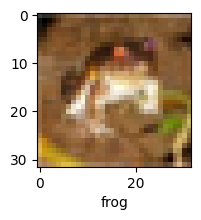

In [ ]:
plot_sample(X_train, y_train, 0)

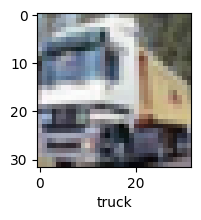

In [ ]:
plot_sample(X_train, y_train, 1)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
  56/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1674 - loss: 2.2739

I0000 00:00:1721136455.177561     105 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721136455.194868     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3018 - loss: 1.9357
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4208 - loss: 1.6456
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4495 - loss: 1.5557
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4777 - loss: 1.4857
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4976 - loss: 1.4357


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


108/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

W0000 00:00:1721136477.696616     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.40      0.73      0.52      1000
           1       0.42      0.81      0.55      1000
           2       0.42      0.32      0.36      1000
           3       0.30      0.51      0.38      1000
           4       0.52      0.27      0.36      1000
           5       0.45      0.24      0.31      1000
           6       0.64      0.35      0.45      1000
           7       0.57      0.53      0.55      1000
           8       0.68      0.48      0.56      1000
           9       0.62      0.32      0.43      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3850 - loss: 1.6865
Epoch 2/10
  80/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5763 - loss: 1.1697

W0000 00:00:1721136490.100250     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5996 - loss: 1.1376
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6545 - loss: 0.9966
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6873 - loss: 0.9013
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7109 - loss: 0.8270
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7314 - loss: 0.7800
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7542 - loss: 0.7167
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7623 - loss: 0.6776
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7764 - loss: 0.6437
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7898 - loss: 0.6010


In [ ]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6793 - loss: 0.9680


W0000 00:00:1721136523.630434     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[0.9691672921180725, 0.6848999857902527]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


W0000 00:00:1721136525.112284     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


array([[1.45073805e-04, 2.28132587e-04, 2.13878302e-04, 2.28937820e-01,
        1.20148610e-03, 7.56442547e-01, 2.84198963e-04, 3.53348267e-04,
        1.17792711e-02, 4.14288603e-04],
       [1.18062962e-02, 3.08873761e-03, 1.56004207e-05, 2.58531827e-06,
        6.73700015e-07, 8.20860091e-09, 3.26665273e-08, 8.67027172e-10,
        9.85060632e-01, 2.53203143e-05],
       [1.11067191e-01, 3.90736222e-01, 4.99415211e-03, 2.16225851e-02,
        5.04795928e-03, 3.01413634e-03, 3.34434677e-03, 4.43820702e-03,
        4.37497377e-01, 1.82377826e-02],
       [8.32140744e-01, 1.13111734e-02, 2.77219992e-02, 2.04229425e-03,
        3.89252510e-03, 1.33149342e-05, 6.15589495e-04, 6.59372199e-06,
        1.22237444e-01, 1.82524946e-05],
       [4.83014901e-07, 2.59414423e-06, 3.34925880e-03, 2.12778635e-02,
        1.01822361e-01, 3.16885277e-03, 8.70283961e-01, 5.68746236e-06,
        8.87861752e-05, 7.53869571e-08]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

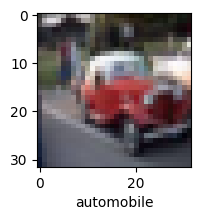

In [ ]:
plot_sample(X_test, y_test,2351)

In [ ]:
classes[y_classes[2351]]

'truck'

In [ ]:
classes[y_classes[3]]

'airplane'